In [1]:
import pandas as pd
try:
  import pickle5 as pickle
except:
  !pip install pickle5
  import pickle5 as pickle
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, GlobalMaxPooling1D, Flatten
from keras.layers import Conv1D, MaxPooling1D, Embedding, Concatenate
from keras.models import Model
from sklearn.metrics import roc_auc_score,roc_curve, auc
from numpy import random
from keras.layers import LSTM, Bidirectional, GlobalMaxPool1D, Dropout
from keras.optimizers import Adam
from keras.utils.vis_utils import plot_model
import seaborn as sns

import sys
sys.path.insert(0,'/content/drive/MyDrive/ML_Data/')
import functions as f

     |████████████████████████████████| 133kB 10.4MB/s 
  Created wheel for pickle5: filename=pickle5-0.0.11-cp37-cp37m-linux_x86_64.whl size=219271 sha256=b1c72f0086d2e435a64ac39140fd3532e776a62077470cf2b41420eded6bf97e
  Stored in directory: /root/.cache/pip/wheels/a6/90/95/f889ca4aa8b0e0c7f21c8470b6f5d6032f0390a3a141a9a3bd
Successfully built pickle5


In [3]:
def load_data(D=1,randomize=False):
    try:
        with open('/content/drive/MyDrive/ML_Data/df_train_'+str(D)+'D.pickle', 'rb') as handle:
            df_train = pickle.load(handle)
    except:
        df_train = pd.read_pickle("C:/Users/nik00/py/proj/hyppi-train.pkl")
    try:
        with open('/content/drive/MyDrive/ML_Data/df_test_'+str(D)+'D.pickle', 'rb') as handle:
            df_test = pickle.load(handle)
    except:
        df_test = pd.read_pickle("C:/Users/nik00/py/proj/hyppi-independent.pkl")
    if randomize:
        return shuff_together(df_train,df_test)
    else:
        return df_train,df_test

df_train,df_test = load_data(4)
print('The data used will be:')
df_train[['Joined']]

The data used will be:


,Joined
0,"[MKDK, KDKQ, DKQK, KQKK, QKKK, KKKK, KKKE, KKE..."
1,"[MSWS, SWSG, WSGL, SGLL, GLLH, LLHG, LHGL, HGL..."
2,"[MSLF, SLFD, LFDL, FDLF, DLFR, LFRG, FRGF, RGF..."
3,"[MAVA, AVAP, VAPR, APRL, PRLF, RLFG, LFGG, FGG..."
4,"[MSTI, STIQ, TIQS, IQSE, QSET, SETD, ETDC, TDC..."
...,...
6265,"[MSYF, SYFG, YFGE, FGEH, GEHF, EHFW, HFWG, FWG..."
6266,"[MTVG, TVGK, VGKS, GKSS, KSSK, SSKM, SKML, KML..."
6267,"[MNNL, NNLS, NLSF, LSFS, SFSE, FSEL, SELC, ELC..."
6268,"[MAPE, APEI, PEIN, EINL, INLP, NLPG, LPGP, PGP..."


Median length of Joined sequence is 877


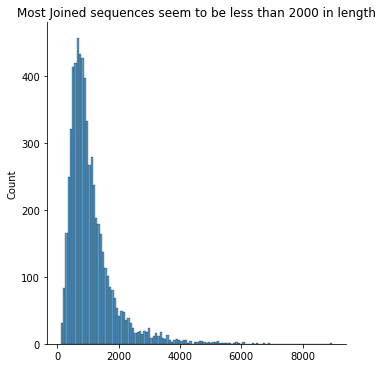

In [ ]:
rows = df_train['Joined'].shape[0]
lengths = sorted(len(s) for s in df_train['Joined'])
print("Median length of Joined sequence is",lengths[len(lengths)//2])
_  = sns.displot(lengths)
_=plt.title("Most Joined sequences seem to be less than 2000 in length")

MAX_VOCAB_SIZE is 50000
MAX_SEQUENCE_LENGTH is 2000
max sequence_data length: 6331
min sequence_data length: 50
median sequence_data length: 607


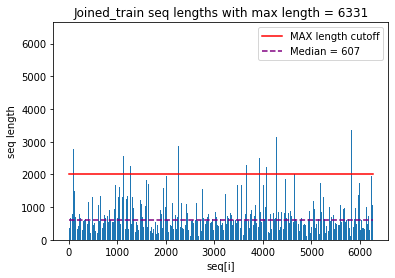

max word index: 49999
Found 157062 unique tokens.
pre padding.
Shape of data tensor: (6270, 2000)
max sequences_test length: 4461
min sequences_test length: 91
median sequences_test length: 615


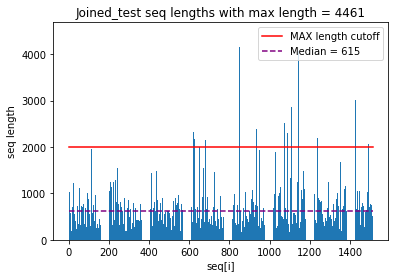

pre padding for test seq.
Shape of data_test tensor: (1514, 2000)
num_words is 50000


In [4]:
data_4D_join_pre,data_test_4D_join_pre,num_words_4D_join,MAX_SEQUENCE_LENGTH_4D,MAX_VOCAB_SIZE_4D = f.get_seq_data_join(50000,2000,df_train,df_test, pad='pre', show = True)

In [5]:
data_4D_join_center,data_test_4D_join_center,num_words_4D_join,MAX_SEQUENCE_LENGTH_4D,MAX_VOCAB_SIZE_4D = f.get_seq_data_join(50000,2000,df_train,df_test, pad='center')

MAX_VOCAB_SIZE is 50000
MAX_SEQUENCE_LENGTH is 2000
max sequence_data length: 6331
min sequence_data length: 50
median sequence_data length: 607
max word index: 49999
Found 157062 unique tokens.
Center padding.
Shape of data tensor: (6270, 2000)
max sequences_test length: 4461
min sequences_test length: 91
median sequences_test length: 615
Center padding for test seq.
Shape of data_test tensor: (1514, 2000)
num_words is 50000


In [6]:
data_4D_join_post,data_test_4D_join_post,num_words_4D_join,MAX_SEQUENCE_LENGTH_4D,MAX_VOCAB_SIZE_4D = f.get_seq_data_join(50000,2000,df_train,df_test, pad='post')

MAX_VOCAB_SIZE is 50000
MAX_SEQUENCE_LENGTH is 2000
max sequence_data length: 6331
min sequence_data length: 50
median sequence_data length: 607
max word index: 49999
Found 157062 unique tokens.
post padding.
Shape of data tensor: (6270, 2000)
max sequences_test length: 4461
min sequences_test length: 91
median sequences_test length: 615
post padding for test seq.
Shape of data_test tensor: (1514, 2000)
num_words is 50000


In [7]:

EMBEDDING_DIM_4D = 5
VALIDATION_SPLIT = 0.2
BATCH_SIZE = 128
EPOCHS = 10
M_4D=10


x1 = f.BiLSTM_model(MAX_SEQUENCE_LENGTH_4D, EMBEDDING_DIM_4D, num_words_4D_join, M_4D)
x2 = f.BiLSTM_model(MAX_SEQUENCE_LENGTH_4D, EMBEDDING_DIM_4D, num_words_4D_join, M_4D)
x3 = f.BiLSTM_model(MAX_SEQUENCE_LENGTH_4D, EMBEDDING_DIM_4D, num_words_4D_join, M_4D)

concatenator = Concatenate(axis=1)
x = concatenator([x1.output, x2.output, x3.output])
x = Dense(128)(x)
x = Dropout(0.2)(x)
output = Dense(1, activation="sigmoid",name="Final")(x)
model4D_join = Model(inputs=[x1.input, x2.input, x3.input], outputs=output)

model4D_join.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)

trains = [data_4D_join_pre,data_4D_join_center,data_4D_join_post]
tests = [data_test_4D_join_pre,data_test_4D_join_center,data_test_4D_join_post]


jk = model4D_join.fit(trains,df_train['label'].values, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(tests,df_test['label'].values))
#plot_model(model4D_join, to_file='model_plot.png', show_shapes=True, show_layer_names=False)
print(roc_auc_score(df_test['label'].values, model4D_join.predict(tests)))

Epoch 1/10
49/49 [==============================] - 52s 594ms/step - loss: 0.9834 - accuracy: 0.5115 - val_loss: 0.7169 - val_accuracy: 0.5119
Epoch 2/10
49/49 [==============================] - 27s 553ms/step - loss: 0.6015 - accuracy: 0.6815 - val_loss: 0.4913 - val_accuracy: 0.7728
Epoch 3/10
49/49 [==============================] - 27s 556ms/step - loss: 0.2827 - accuracy: 0.9061 - val_loss: 0.4830 - val_accuracy: 0.7880
Epoch 4/10
49/49 [==============================] - 27s 560ms/step - loss: 0.1522 - accuracy: 0.9487 - val_loss: 0.5458 - val_accuracy: 0.7853
Epoch 5/10
49/49 [==============================] - 27s 556ms/step - loss: 0.0925 - accuracy: 0.9663 - val_loss: 0.6778 - val_accuracy: 0.7761
Epoch 6/10
49/49 [==============================] - 27s 556ms/step - loss: 0.0638 - accuracy: 0.9785 - val_loss: 0.6992 - val_accuracy: 0.7873
Epoch 7/10
49/49 [==============================] - 27s 557ms/step - loss: 0.0534 - accuracy: 0.9793 - val_loss: 0.7713 - val_accuracy: 0.7728

In [ ]:
#0.8271543969189371

In [ ]:
#model4D_join.save('/content/drive/MyDrive/ML_Data/model4D_join.h5')